<a href="https://colab.research.google.com/github/AVerma27/AdaBoost-Classifier/blob/main/Real_Fake_Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Aditi Verma  Roll No: 21301010  MTech First Year

# Real and Fake Face Detection Dataset

### Dataset Download link : https://www.kaggle.com/ciplab/real-and-fake-face-detection

## SVM Classifier



### Importing necessary modules

In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
import skimage

In [ ]:
from skimage.io import imread
from skimage.transform import resize

### Loading the images from dataset

Loading and converting the images from the dataset into array form for the classifier to process it


In [ ]:
def load_image_files(container_path, dimension=(64, 64)):
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]
    descr = "A face detection dataset"
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = skimage.io.imread(file)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)
    
    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)

In [ ]:
image_dataset = load_image_files(r"C:\Users\aditi\Downloads\RealAndFakeDataset\real_and_fake_face_detection\real_and_fake_face")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    image_dataset.data, image_dataset.target, test_size=0.3,random_state=109)

In [ ]:
param_grid = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},]
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

### Prediction 

In [ ]:
y_pred = clf.predict(X_test)
print(y_pred)

[0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0
 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0
 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0
 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0
 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1
 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1
 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0
 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1
 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1
 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0
 0 1 1 0 1 1 1 0 0 1 0 0 

### Generating classification report 

In [ ]:
print("Classification report for - \n{}:\n{}\n".format(clf, metrics.classification_report(y_test, y_pred)))

Classification report for - 
GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}]):
              precision    recall  f1-score   support

           0       0.62      0.60      0.61       296
           1       0.64      0.65      0.65       317

    accuracy                           0.63       613
   macro avg       0.63      0.63      0.63       613
weighted avg       0.63      0.63      0.63       613




For the real and fake face dataset the average accuracy was coming around 62%, average recall value is around 62%, f1-score is around 62%,support is around 541.

### Heatmap for two classes 

<IPython.core.display.Javascript object>


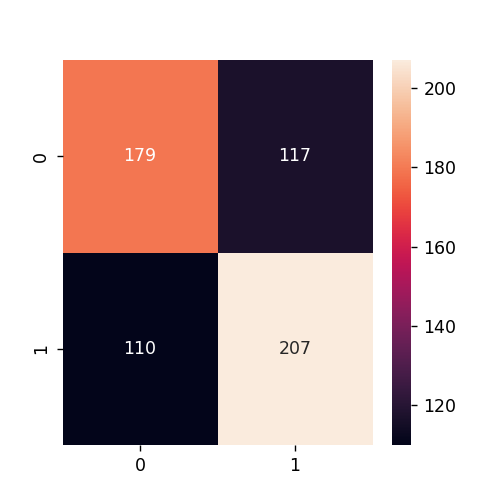

<AxesSubplot:>

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(4,4))

cm=confusion_matrix(y_test, y_pred)
class_labels=['0','1']

# show cm 
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

# CNN Classifier

In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from sklearn.metrics import confusion_matrix
import itertools
import os
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
import os

real = r"C:\Users\aditi\Downloads\RealAndFakeDataset\real_and_fake_face_detection\real_and_fake_face\training_real/"
fake = r"C:\Users\aditi\Downloads\RealAndFakeDataset\real_and_fake_face_detection\real_and_fake_face\training_fake/"
datadir =r"C:\Users\aditi\Downloads\RealAndFakeDataset\real_and_fake_face_detection\real_and_fake_face/"


real_path = os.listdir(real)
fake_path = os.listdir(fake)

### **Taking a closer look at the images**

#### **1. Real Face**

In [ ]:
def load_img(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (224, 224))
#     print(labels)
    return image[...,::-1]

In [ ]:
plt.imshow(load_img(real + real_path[2]), cmap='gray')

In [ ]:
plt.imshow(load_img(real + real_path[20]), cmap='gray')

**2. Fake Face**

In [ ]:
plt.imshow(load_img(fake + fake_path[20]), cmap='gray')

In [ ]:
plt.imshow(load_img(fake + fake_path[80]), cmap='gray')

In [ ]:
# datadir = "dataset"
categories = ["training_real" , "training_fake"]

for category in categories:
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        # plt.imshow(img_array, cmap= plt.cm.binary)
        plt.show()
        print(category)
        break
    break

training_real


### **Creating Training Data**

In [ ]:
training_data = []
IMG_SIZE = 224

## This means 0 will indicate Real facial Images and 1 to Fake facial Images.

categories = ["training_real" , "training_fake"]

def create_training_data():
    for category in categories:
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except:
                pass
create_training_data()

In [ ]:
training_data = np.array(training_data)
print(training_data.shape)

(2041, 2)


C:\Users\aditi\AppData\Local\Temp/ipykernel_19464/4048587886.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training_data = np.array(training_data)


### Building X(Features) and Y(Labels) for train test split

**np.random.shuffle(array)** 

Shuffling here is important as the data is sequential therefore if directly fed into the network, the network just learn to give a single prediction and not on meri

In [ ]:
import random

np.random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

0
1
0
1
1
1
0
1
1
1


In [ ]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

In [ ]:
print(X.shape)
print(y.shape)

(2041, 224, 224, 3)
(2041,)


In [ ]:
print(np.unique(y, return_counts = True))
## (array([0, 1]), array([1081,  960])) This should be the answer

print(y[1:10])

(array([0, 1]), array([1081,  960], dtype=int64))
[1 0 1 1 1 0 1 1 1]


In [ ]:
## Normalization 
X = X/255.0 

#### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Shape of test_x: ",X_train.shape)
print("Shape of train_y: ",y_train.shape)
print("Shape of test_x: ",X_test.shape)
print("Shape of test_y: ",y_test.shape)

Shape of test_x:  (1632, 224, 224, 3)
Shape of train_y:  (1632,)
Shape of test_x:  (409, 224, 224, 3)
Shape of test_y:  (409,)


In [ ]:
print(y_test[1:10])

[0 0 0 0 0 1 1 0 1]


In [ ]:
print(np.unique(y_train, return_counts = True))
print(np.unique(y_test, return_counts = True))

(array([0, 1]), array([857, 775], dtype=int64))
(array([0, 1]), array([224, 185], dtype=int64))


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

train_x = tf.keras.utils.normalize(X_train,axis=1)
test_x = tf.keras.utils.normalize(X_test, axis=1)

In [ ]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',
                            input_shape= X.shape[1:]),
            tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
            tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(2, activation=tf.nn.softmax)

])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train,y_train, batch_size=20, epochs = 5, validation_split=0.1)

Epoch 1/5
74/74 [==============================] - 313s 4s/step - loss: 0.7932 - accuracy: 0.5102 - val_loss: 0.6925 - val_accuracy: 0.5427
Epoch 2/5
74/74 [==============================] - 282s 4s/step - loss: 0.6932 - accuracy: 0.5191 - val_loss: 0.6918 - val_accuracy: 0.5427
Epoch 3/5
74/74 [==============================] - 295s 4s/step - loss: 0.6945 - accuracy: 0.5232 - val_loss: 0.6917 - val_accuracy: 0.5427
Epoch 4/5
74/74 [==============================] - 328s 4s/step - loss: 0.6925 - accuracy: 0.5232 - val_loss: 0.6913 - val_accuracy: 0.5427
Epoch 5/5
74/74 [==============================] - 345s 5s/step - loss: 0.6923 - accuracy: 0.5232 - val_loss: 0.6909 - val_accuracy: 0.5427


### Visualizing Training Loss and Accuracy

<IPython.core.display.Javascript object>


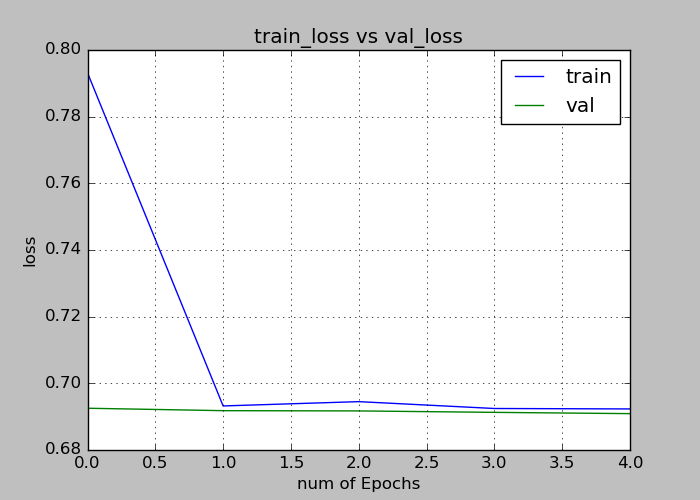

In [ ]:
epochs = 5
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

### Evaluation on Test Data 

In [ ]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print("Loss:",val_loss)
print("Accuracy:",val_acc)

13/13 [==============================] - 23s 2s/step - loss: 0.6906 - accuracy: 0.5477
Loss: 0.6905863881111145
Accuracy: 0.5476772785186768


### Predictions

In [ ]:
predictions = model.predict(X_test)
# predictions

In [ ]:
#rounded_predictions = model.predict_classes(x = X_test, batch_size=10, verbose=0)
rounded_predictions = np.argmax(predictions,axis=1)
for i in rounded_predictions[:10]:
    print(i)

0
0
0
0
0
0
0
0
0
0


### Confusion Matrix

In [ ]:
# %matplotlib inline
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test,rounded_predictions)
#confusion_matrix(y_test,rounded_predictions)

<IPython.core.display.Javascript object>


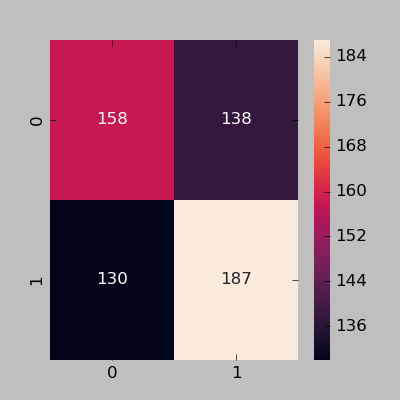

<AxesSubplot:>

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(4,4))

#cm=confusion_matrix(y_test, y_pred)
class_labels=['0','1']

# show cm 
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

In [ ]:
def plot_confusion_matrix(cm, classes,
    normalize=False,
    title='Confusion matrix',
    cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = ['Real', 'Fake']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

Confusion matrix, without normalization
[[224   0]
 [185   0]]


# Adaboost Implementation 

In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split

In [ ]:
import skimage

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from skimage.io import imread
from skimage.transform import resize

### Loading the file path and converting our image dataset to numpy array for our adaboost classifier to take it.



In [ ]:
def load_image_files(container_path, dimension=(64, 64)):
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]
    descr = "A face detection dataset"
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = skimage.io.imread(file)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)
    
    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)

### Loading our dataset

In [ ]:
image_dataset = load_image_files(r"C:\Users\aditi\Downloads\RealAndFakeDataset\real_and_fake_face_detection\real_and_fake_face")

### Splitting the dataset to train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    image_dataset.data, image_dataset.target, test_size=0.3,random_state=109)

### Taking our base model as decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

### Giving our estimators their criteria and fitting our model

In [ ]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [100]
             }
DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced",max_depth = None)
ABC = AdaBoostClassifier(base_estimator = DTC)
clf = GridSearchCV(ABC, param_grid=param_grid)
clf.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                max_features='auto',
                                                                                random_state=11)),
             param_grid={'base_estimator__criterion': ['gini', 'entropy'],
                         'base_estimator__splitter': ['best', 'random'],
                         'n_estimators': [100]})

### Doing the prediction on the classifier

In [ ]:
y_pred = clf.predict(X_test)

### Printing the classification report

In [ ]:
print("Classification report for - \n{}:\n{}\n".format(
    clf, metrics.classification_report(y_test, y_pred)))

Classification report for - 
GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                max_features='auto',
                                                                                random_state=11)),
             param_grid={'base_estimator__criterion': ['gini', 'entropy'],
                         'base_estimator__splitter': ['best', 'random'],
                         'n_estimators': [100]}):
              precision    recall  f1-score   support

           0       0.55      0.53      0.54       296
           1       0.58      0.59      0.58       317

    accuracy                           0.56       613
   macro avg       0.56      0.56      0.56       613
weighted avg       0.56      0.56      0.56       613




### Printing the confusion matrix for the two classes

<IPython.core.display.Javascript object>


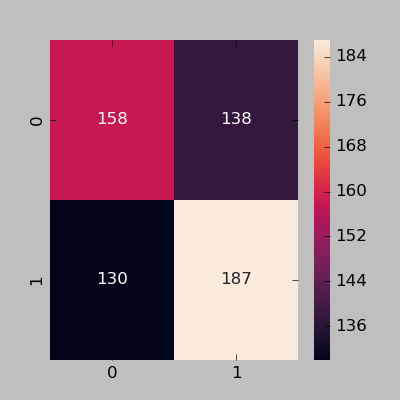

<AxesSubplot:>

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(4,4))

cm=confusion_matrix(y_test, y_pred)
class_labels=['0','1']

# show cm 
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)


## Results and Analysis

<IPython.core.display.Javascript object>


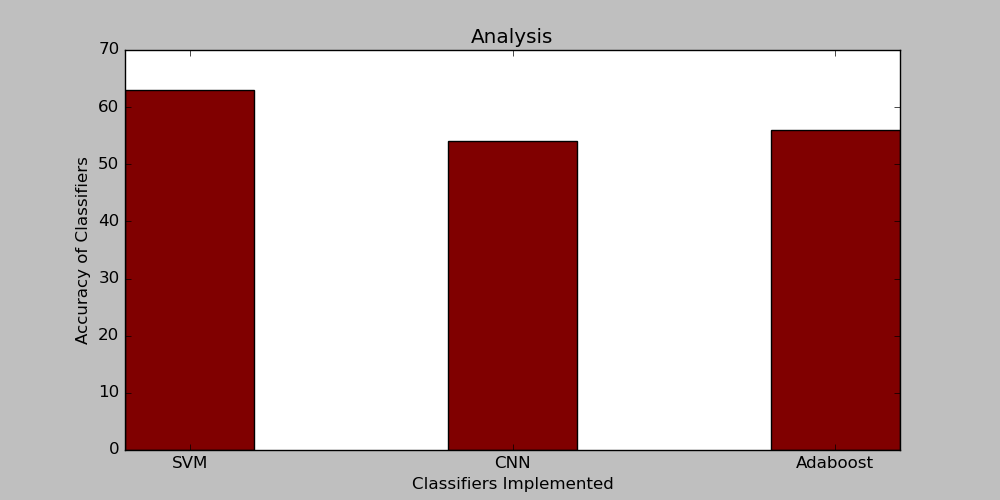

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
data = {'SVM':63, 'CNN':54, 'Adaboost':56}
classifiers = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(classifiers, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Classifiers Implemented")
plt.ylabel("Accuracy of Classifiers")
plt.title("Analysis")
plt.show()